# In the terminal
source activate pdTutorial  
jupyter lab  

In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = sns.load_dataset('titanic')
data['passengerID'] = ['passenger%s'%i for i in data.index]
data[['passengerID', 'sex', 'age', 'alive']].sample(790).to_csv('titanic_personal_roster.tsv', sep='\t', index=False)
data[['passengerID','survived', 'pclass', 'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone']].to_csv('titanic_boat_roster.csv', index=False)

In [66]:
person_data = pd.read_csv('titanic_personal_roster.tsv', sep='\t')
boat_data = pd.read_csv('titanic_boat_roster.csv')

In [67]:
person_data.head()

,passengerID,sex,age,alive
0,passenger125,male,12.0,yes
1,passenger31,female,NaN,yes
2,passenger247,female,24.0,yes
3,passenger102,male,21.0,no
4,passenger502,female,NaN,no


In [68]:
person_data.shape

(790, 4)

In [69]:
boat_data.head()

,passengerID,survived,pclass,fare,embarked,class,deck,embark_town,alone
0,passenger0,0,3,7.2500,S,Third,NaN,Southampton,False
1,passenger1,1,1,71.2833,C,First,C,Cherbourg,False
2,passenger2,1,3,7.9250,S,Third,NaN,Southampton,True
3,passenger3,1,1,53.1000,S,First,C,Southampton,False
4,passenger4,0,3,8.0500,S,Third,NaN,Southampton,True


In [70]:
boat_data.shape

(891, 9)

In [71]:
data = person_data.merge(boat_data, on='passengerID', how='outer')

In [72]:
data.head()

,passengerID,sex,age,alive,survived,pclass,fare,embarked,class,deck,embark_town,alone
0,passenger125,male,12.0,yes,1,3,11.2417,C,Third,NaN,Cherbourg,False
1,passenger31,female,NaN,yes,1,1,146.5208,C,First,B,Cherbourg,False
2,passenger247,female,24.0,yes,1,2,14.5000,S,Second,NaN,Southampton,False
3,passenger102,male,21.0,no,0,1,77.2875,S,First,D,Southampton,False
4,passenger502,female,NaN,no,0,3,7.6292,Q,Third,NaN,Queenstown,True


ValueError: cannot convert float NaN to integer

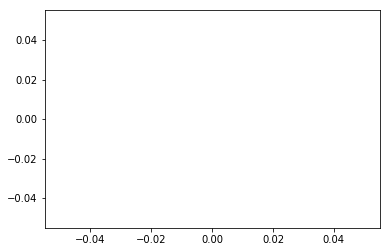

In [73]:
sns.distplot(data['age'])

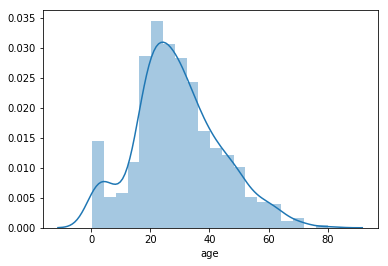

In [74]:
sns.distplot(data['age'].dropna())

In [112]:
data.loc['mean', :] = data.mean(axis=0)

In [114]:
data.tail()

,passengerID,sex,age,alive,survived,pclass,fare,embarked,class,deck,embark_town,alone,adult,adult_male
887,passenger850,NaN,NaN,NaN,0.000000,3.000000,31.275000,S,Third,NaN,Southampton,False,False,False
888,passenger851,NaN,NaN,NaN,0.000000,3.000000,7.775000,S,Third,NaN,Southampton,True,False,False
889,passenger861,NaN,NaN,NaN,0.000000,2.000000,11.500000,S,Second,NaN,Southampton,False,False,False
890,passenger890,NaN,NaN,NaN,0.000000,3.000000,7.750000,Q,Third,NaN,Queenstown,True,False,False
mean,NaN,NaN,29.358984,NaN,0.383838,2.308642,32.204208,NaN,NaN,NaN,NaN,0.602694,0.573513,0.38945


# Indexing

In [75]:
data['adult'] = data['age'] > 18

In [76]:
data['adult'].head()

0    False
1    False
2     True
3     True
4    False
Name: adult, dtype: bool

In [77]:
sum(data['adult'])

511

In [78]:
list(data)

['passengerID',
 'sex',
 'age',
 'alive',
 'survived',
 'pclass',
 'fare',
 'embarked',
 'class',
 'deck',
 'embark_town',
 'alone',
 'adult']

In [79]:
data['sex'].value_counts()

male      514
female    276
Name: sex, dtype: int64

In [80]:
data.loc[(data['adult']==True)&
         (data['sex']=='male'), :].head()

,passengerID,sex,age,alive,survived,pclass,fare,embarked,class,deck,embark_town,alone,adult
3,passenger102,male,21.0,no,0,1,77.2875,S,First,D,Southampton,False,True
7,passenger588,male,22.0,no,0,3,8.0500,S,Third,NaN,Southampton,True,True
8,passenger242,male,29.0,no,0,2,10.5000,S,Second,NaN,Southampton,True,True
10,passenger741,male,36.0,no,0,1,78.8500,S,First,C,Southampton,False,True
15,passenger690,male,31.0,yes,1,1,57.0000,S,First,B,Southampton,False,True


In [82]:
data.loc[(data['adult']==True)&
         (data['sex']=='male'), 'survived'].head()

3     0
7     0
8     0
10    0
15    1
Name: survived, dtype: int64

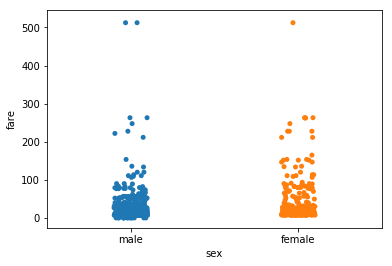

In [87]:
sns.stripplot(x='sex', y='fare', data=data)

(-5, 300)

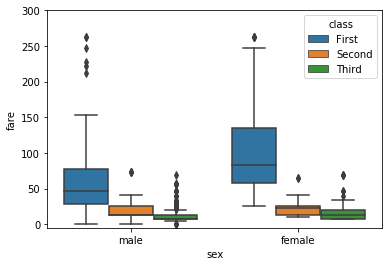

In [92]:
sns.boxplot(x='sex', y='fare', hue='class', data=data,
            hue_order=['First', 'Second', 'Third'])
plt.ylim(-5, 300)
# plt.savefig('boxplot_fare_class.png', dpi=200, transparent=True)

# Let's test a hypothesis

Are you more likely to survive if you are in first class?

In [96]:
numFirstSurvived = sum(data.loc[data['class']=='First', 'survived']==1)
numFirstDead = sum(data.loc[data['class']=='First', 'survived']==0)
numNotFirstSurvived = sum(data.loc[data['class']!='First', 'survived']==1)
numNotFirstDead = sum(data.loc[data['class']!='First', 'survived']==0)

In [97]:
scipy.stats.fisher_exact([[numFirstSurvived, numFirstDead], 
                          [numNotFirstSurvived, numNotFirstDead]])

(3.8703883495145632, 3.707775247822457e-17)

In [99]:
print(numFirstSurvived/numFirstDead)

1.7


In [100]:
print(numNotFirstSurvived/numNotFirstDead)

0.43923240938166314


Bonus: what could be a problem with this code?

# Is is because there were more first class women or children?

In [106]:
data['adult_male'] = ((data['age']>18)&(data['sex']=='male'))

In [108]:
numAdMaleFirst = sum(data.loc[data['adult_male']==True, 'class']=='First')

numAdMaleNotFirst = sum(data.loc[data['adult_male']==True, 'class']!='First')

numWomChilFirst = sum(data.loc[data['adult_male']==False, 'class']=='First')

numWomChilNotFirst = sum(data.loc[data['adult_male']==False, 'class']!='First')

In [111]:
scipy.stats.fisher_exact([[numAdMaleFirst, numAdMaleNotFirst], 
                          [numWomChilFirst, numWomChilNotFirst]])

(1.2532168235068177, 0.17293307877908315)